In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform
- 이미지에 적용시, 밝기 변화가 큰 부분은 고주파, 변환이 적은 곳은 저주파로 표현
- 즉 이미지 경계선은 고주파, 배경은 저주파
- 배경과 경계선 중 원하는 것을 남기기 위해서 image -> FT -> 주파수 제거 -> image

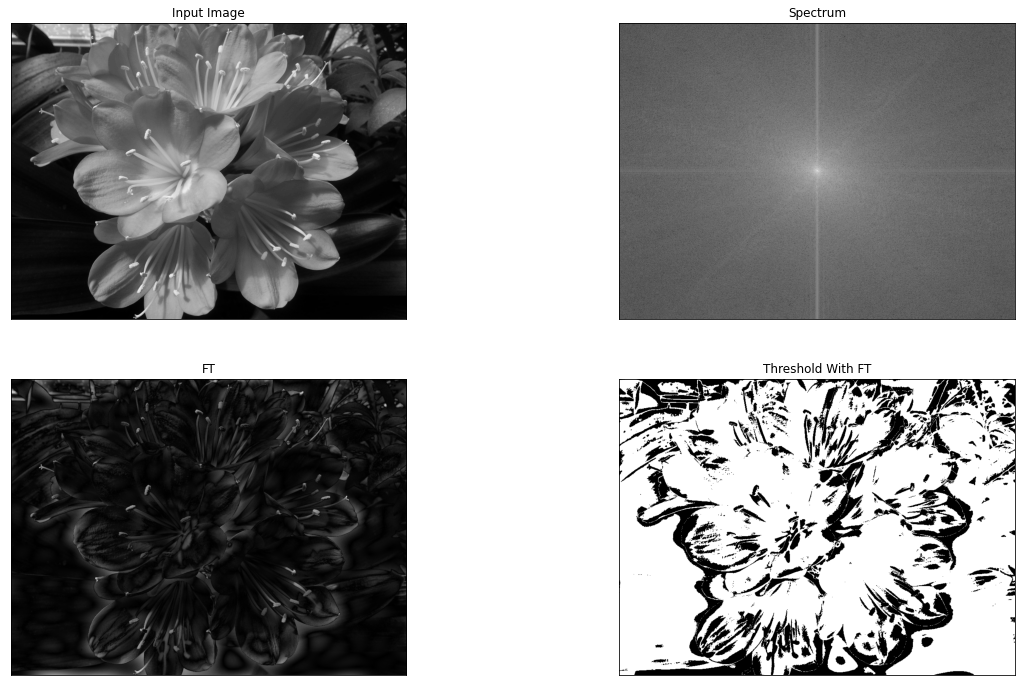

In [29]:
# with numpy
img = cv2.imread('src/flower1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

##fft
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f) # 저주파를 중앙으로 shift
magnitude_spectrum = 20 * np.log(np.abs(fshift)) # spectrum

rows,cols = gray.shape
c_row, c_col = rows//2, cols//2 # center coord

d = 10
fshift[c_row - d: c_row +d, c_col - d : c_col + d] = 1 # 중앙 20 pixel값을 1로 변환 : 저주파 제거(배경)

##Inverse_fft
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

img_new = np.uint8(img_back)
ret, thresh = cv2.threshold(img_new, 20, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize = (20,12))
plt.subplot(221),plt.imshow(gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(img_back, cmap = 'gray')
plt.title('FT'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold With FT'), plt.xticks([]), plt.yticks([])
plt.show()

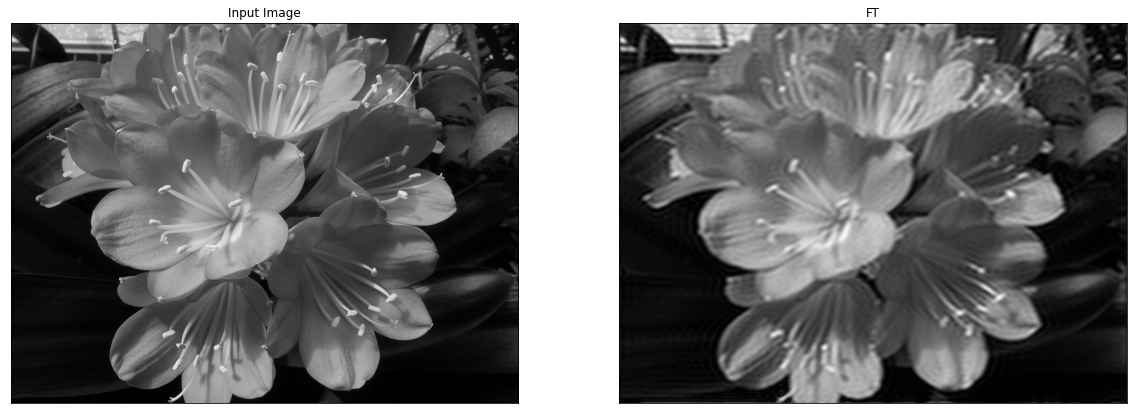

In [43]:
# with opencv
# remove high freq.
img = cv2.imread('src/flower1.jpg',0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

rows, cols = img.shape
c_row, c_col = rows//2, cols//2

d = 60
mask = np.zeros((rows,cols,2), np.uint8)
mask[c_row - d : c_row + d, c_col - d : c_col + d] = 1
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize = (20,12))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('FT'), plt.xticks([]), plt.yticks([])
plt.show()